# Basics of Algorithm Implementation
_________________________________________________________
### Table of Contents

1. [What is an Algorithm?](#paragraph1)
2. [Algorithms and Programming](#paragraph2)
3. [Algorithm Implementation](#paragraph3)
4. [Algorithms in Action](#paragraph4)
5. [Coding an Algorithm](#paragraph5)
6. [Sorting Algorithms](#paragraph6)
7. [Performance measurement of sorting algorithms](#paragraph7)
8. [Optimizing algorithm implementation performance](#paragraph8)
9. [Further ideas for optimization](#paragraph9)
10. [Implementation issues](#paragraph10)


# What is an Algorithm? <a class="anchor" id="paragraph1"></a>

There are many ways of conceptualizing what an algorithm is, but the gist of it is that it comprises a set of rules that precisely defines a sequence of operations.

This can apply to almost anything from how to go about counting things, to solving a math problem, or even baking a cake.

What is important is that there is an order of instructions in which inputs are being handled and transformed into useful outputs.

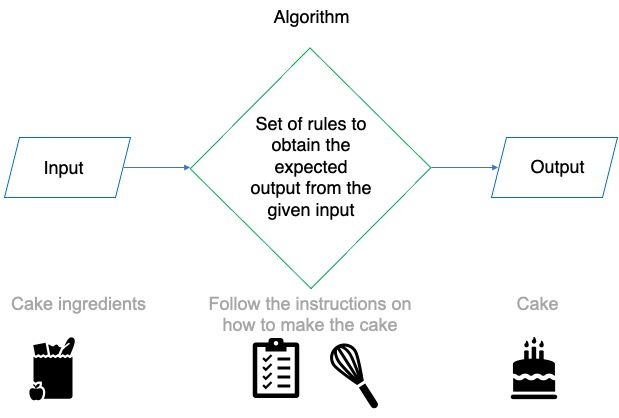

To further elaborate on this, we will introduce some useful principles for designing algorithms:

•	**Clear and Unambiguous**:  Each step should be clear in all aspects and must be interpretable in a consistent way.

•	**Well-Defined Inputs**: If an algorithm requires inputs, they should be well-defined.

•	**Well-Defined Outputs**: The algorithm must clearly communicate what output it yields.

•	**Finite-ness**: An algorithm must be finite, i.e. it should not loop infinitely without producing a useful output.

•	**Feasible**: The algorithm must be implementable with the available resources (e.g., time, budget, hardware constraints).


# Algorithms and Programming <a class="anchor" id="paragraph2"></a>

Now that we have defined what an algorithm is, the next step is to consider how to utilize them in a programming context.

The following process is a useful starting point for getting from a problem to a working solution:

1.	Understand the problem 
2.	Think of alternative solutions to the problem.
3.	Write down the solution, diagram, flowcharts, pseudocode.
4.	Pick a programming language and code up the program. 
5.	Debug the code, make sure that the code does what you want it to do.

It is important to document the program with useful comments, use expressive variable names, and apply consistent indentation throughout the whole process. Make it easy for others and yourself to follow your train of thought when having to review your work.

When trying to better **understand the problem**, a powerful method is to apply the principle of divide and conquer to break down complex problems into less complex ones.

As you develop a better **understanding of the problem**, you will naturally think of alternative solutions. You want to be careful with going all-in on solving the first solution that comes to mind since you might discover it to be unfeasible or time-consuming down the line. Hence you should be open to new ideas as they come to you.

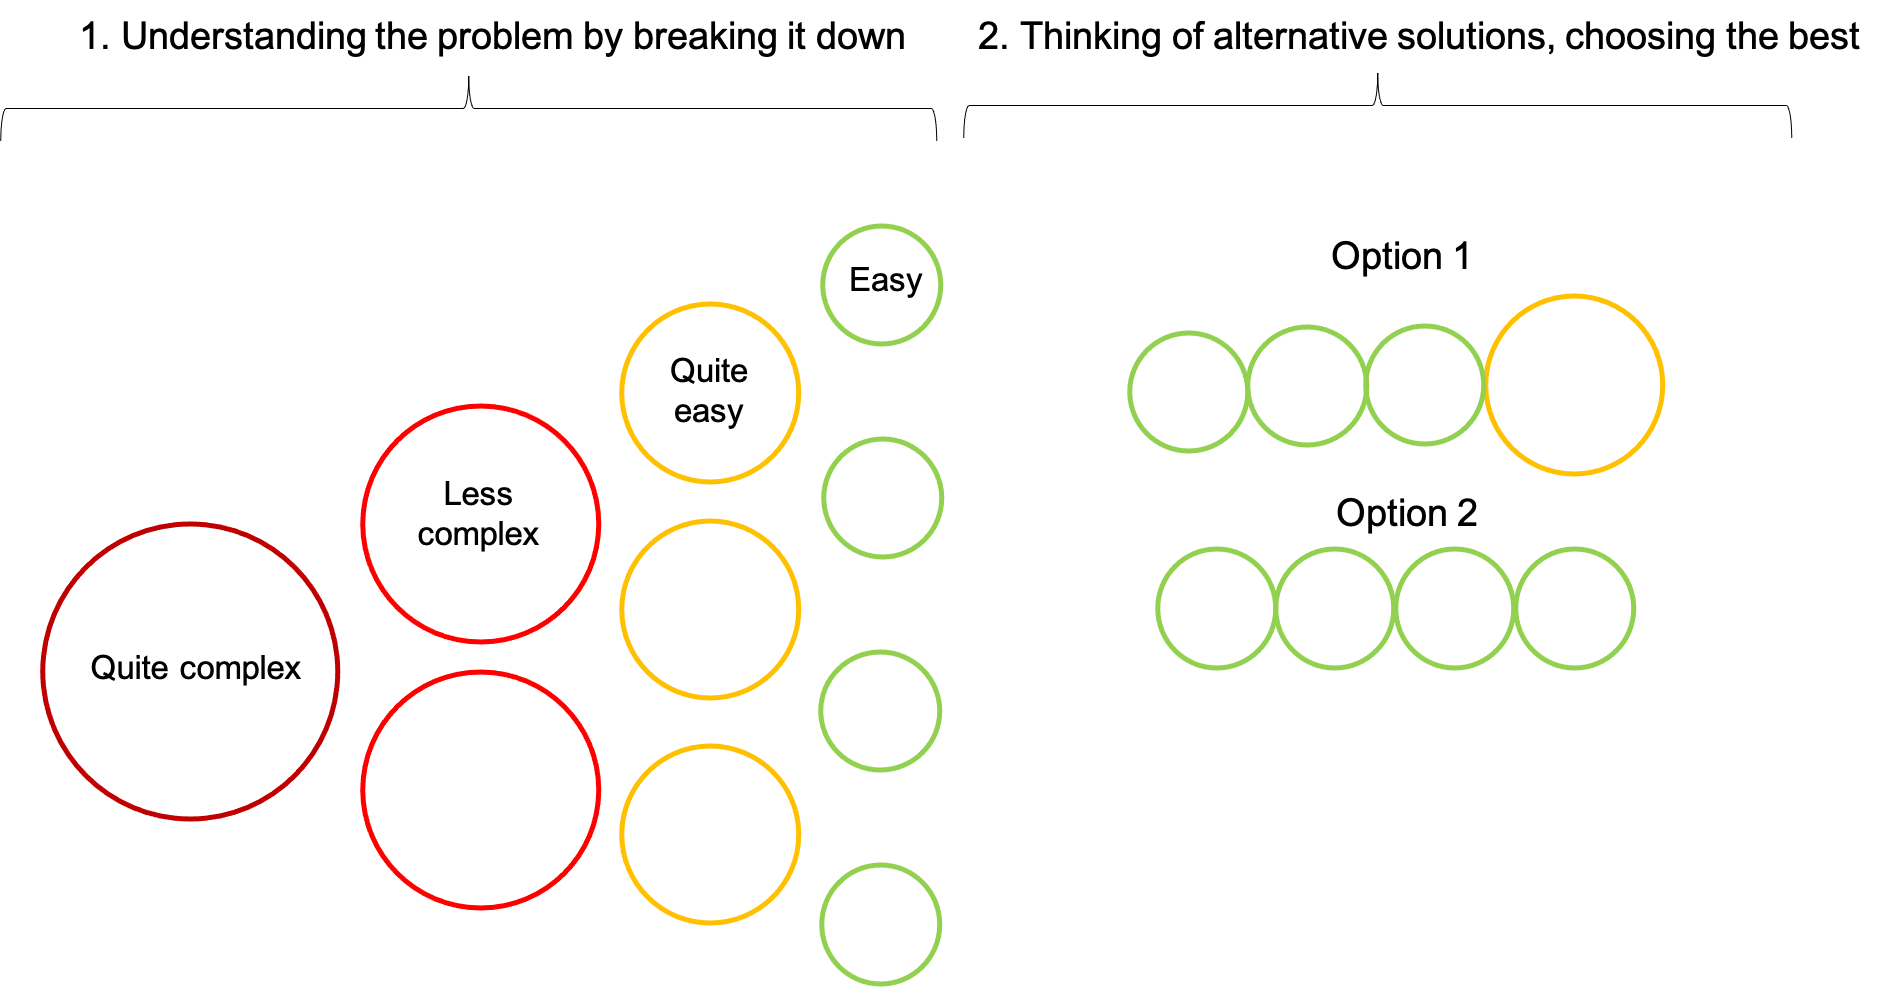

# Algorithm Implementation <a class="anchor" id="paragraph3"></a>

Many considerations go into picking a programming language. Among those is, for example, the “level” of a programming language, ranging from low to high. The list below ranks several different languages. The lowest level corresponds to direct instructions to the CPU.

## Low to high level programming languages

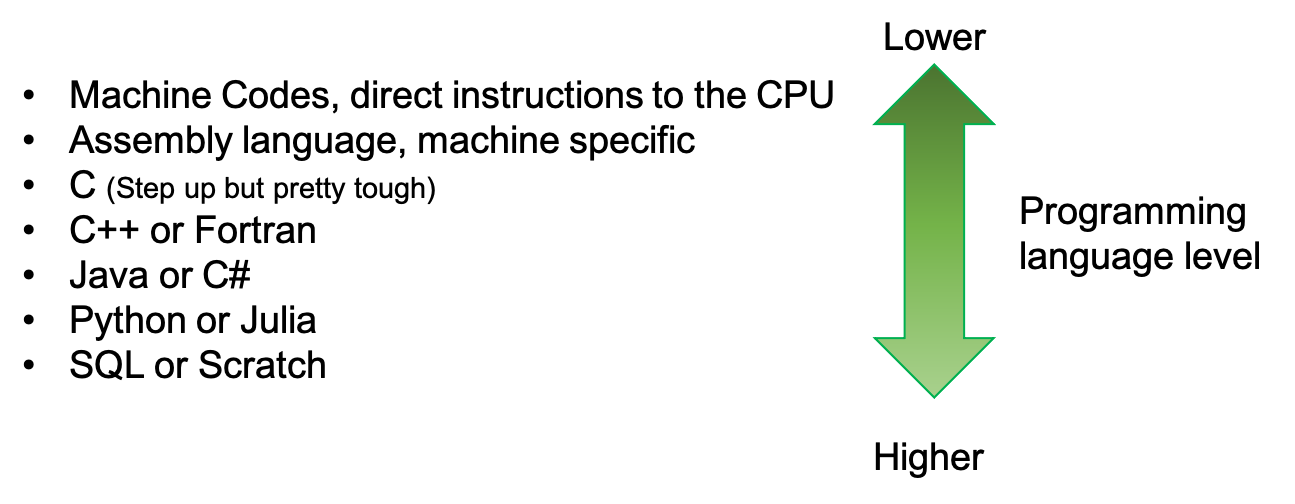

The reason you have to assess what level you want to utilize is that different languages provide different levels of freedoms and responsibilities with how you structure your code because they use different compilers and interpreters (compiles in real-time). These are pieces of software that translate what we are writing into something the computer can understand.

Therefore, different languages have different weaknesses and strengths, e.g. Python performing matrix-algebra faster with arrays than with for-loops. Usually higher level languages trade lower-level control for ease of use, resulting in quicker implementation but slower execution.

After we have chosen our language, translated and implemented our algorithm, we can evaluate our program using the following three concepts:

•	**Correctness**: The program does what we want it to do. 

•	**Design**: The implementation of the solution solution isn’t needlessly verbose, there are no redundancies, no copy & paste, explicit is better than implicit. 

•	**Style**: The code is easy to read by a 3rd person, which might even be yourself in the future. For this purpose, instructions should be explicit rather than implicit, which includes good documentation.

Furthermore, you can also evaluate the complexity of the algorithm by time and  space. 

**Time complexity** quantifies the amount of time taken by an algorithm to run as a function of the length of the input. 

**Space complexity** on the other hand quantifies the amount of memory or space the algorithm takes to run as a function of the length of the input.

# Algorithms in Action <a class="anchor" id="paragraph4"></a>

Before diving into the more technical aspects of designing algorithms, let's introduce a practical use case and construct a handcrafted solution to develop a better intuition for algorithms in action. Feel free to browse through this section at your own pace and return later when you've mastered the basics of algorithm implementation. The purpose of this section is to show how we might develop a solution from start to finish for a concrete problem you might encounter in a real life situation.

In the domain of natural language processing (NLP), for example, algorithms manipulate text/speech to produce useful outputs. NLP is used in many day-to-day applications like translation, chatbots, and sentiment analysis (the process of classifying the opinion of an author about a given subject, e.g. through reviews, news articles, and social media posts). In the following, we will tackle the problem of record linkage.

In 2017, _The Economist_ highlighted that "the world’s most valuable resource is no longer oil, but data". Businesses possess heaps of data that must be cleaned and consolidated before they can create added value. Record linkage is a useful method for automating the process of linking dispersed datasets. For the purposes of this tutorial we will program a solution by hand to illustrate the process of developing an algorithm.

For this example, we will import a dataset from the Freely Extensible Biomedical Record Linkage (Febrl) package which ["contains 1000 records (500 original and 500 duplicates), with exactly one duplicate per original record”](https://recordlinkage.readthedocs.io/en/latest/ref-datasets.html). We will split the dataset in two and attempt to consolidate the dataframes.

In [298]:
from recordlinkage.datasets import load_febrl1

# Import dataset and sort the dataframe by the record id
df = load_febrl1(return_links=False).sort_values(by=['rec_id'])

df.head(10)

,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id
rec_id,,,,,,,,,,
rec-0-dup-0,thomas,rokobaro,12,herschell circuit,killanrey,lawrence,2272,nsw,NaN,1451137
rec-0-org,flynn,rokobaro,12,herschell circuit,killarney,lawrence,2227,nsw,19720812,1451137
rec-1-dup-0,karli,alderson,144,nulsen circuit,iowanna,tings lpa,3139,nsw,19510826,9541034
rec-1-org,karli,alderson,144,nulsen circuit,iowanna,tingalpa,3139,nsw,19510826,9541034
rec-10-dup-0,kayla,harrington,NaN,maltby circuit,coaling,coolaroo,3465,nsw,19150612,9004242
rec-10-org,kayla,harrington,38,maltby circuit,coaling,coolaroo,3465,nsw,19150612,9004242
rec-100-dup-0,luchetti,tiana,112,totterdell street,villa 5,toowoomba,2008,sa,19050127,2712503
rec-100-org,tiana,luchetti,112,totterdell street,villa 5,toowoomba,2008,sa,19050127,2712503
rec-101-dup-0,amberr,coulson,26,NaN,meilene retirement,whitfield,3986,nsw,19950320,3079240


Based on the above excerpt, we can observe that sometimes names don't entirely match, the surname and given name are swapped, entries are missing, or addresses are spelled differently. It would be incredibly time consuming to manually separate duplicate entries. Therefore, after mixing the dataset, we will design an algorithm that will identify matching entries for us.

In [299]:
# Separate all duplicate and original entries by extracting every second entry, 
# starting at the 0th and 1st index respectively
dup = df[::2]
org = df[1::2]

# Split each dataset in two (each contains 250 rows)
sp = int(len(dup) / 2)
dup_1 = dup[:sp]
dup_2 = dup[sp:]
org_1 = org[:sp]
org_2 = org[sp:]

# Combine the dataframes such that each dataframe contains the duplicates/originals
# of the other dataframe, and randomize the order of the rows
df1 = org_1.append(dup_2).sample(frac = 1)
df2 = org_2.append(dup_1).sample(frac = 1)

## Coding an Algorithm <a class="anchor" id="paragraph5"></a>

Based on the following [YouTube tutorial](https://www.youtube.com/watch?v=We3YDTzNXEk), we have programmed an algorithm that computes the Levenshtein distance between two strings. Simply put, Levenshtein distance determines the number of operations required to transform one string into another, where the possible operations are insertion, deletion, and substitution. We will use this algorithm to identify rows with minimum edit distance between each other. Depending on the issues we are facing, we may have to resort to other techniques since our function, for example, would fail to realize that the surname and given name were swapped for record 100. However, given that the other columns match, our solution should in this case still be sufficient to identify all matching rows.

In [300]:
import numpy as np

def lev(a, b):
    '''Compute Levenshtein distance for any two non-empty strings'''
    # The following three lines of code ensure that our function will be compatible with our dataset
    if type(a) == float or type(b) == float:
        return float("NaN")
    a, b = str(a), str(b)
    
    len_a = len(a) + 1
    len_b = len(b) + 1
    matrix = np.zeros([len_a, len_b])
    matrix[:, 0] = list(range(len_a))
    matrix[0] = list(range(len_b))
    for i in range(1, len_a):
        for j in range(1, len_b):
            if a[i-1] == b[j-1]:
                matrix[i, j] = matrix[i-1, j-1]
            else:
                matrix[i, j] = 1 + min(matrix[i-1, j], matrix[i, j-1], matrix[i-1, j-1])
    return matrix[i, j]

In [301]:
def lev_example(a, b):
    len_a = len(a) + 1
    len_b = len(b) + 1
    matrix = np.zeros([len_a, len_b])
    matrix[:, 0] = list(range(len_a))
    matrix[0] = list(range(len_b))
    for i in range(1, len_a):
        for j in range(1, len_b):
            if a[i-1] == b[j-1]:
                matrix[i, j] = matrix[i-1, j-1]
            else:
                matrix[i, j] = 1 + min(matrix[i-1, j], matrix[i, j-1], matrix[i-1, j-1])
    print(matrix)
    return matrix[i, j]

# An example of our algorithm with the same inputs as in the YouTube tutorial.
# We have amended our function so it also prints the final matrix.
lev_example("azced", "abcdef")

[[0. 1. 2. 3. 4. 5. 6.]
 [1. 0. 1. 2. 3. 4. 5.]
 [2. 1. 1. 2. 3. 4. 5.]
 [3. 2. 2. 1. 2. 3. 4.]
 [4. 3. 3. 2. 2. 2. 3.]
 [5. 4. 4. 3. 2. 3. 3.]]


3.0

In [302]:
# Vectorize the lev function so that it may accept dataframes as input
vec_lev = np.vectorize(lev)

# Initialize two dataframes and extract the index so that we can compare our results
orgs = df1.copy().reset_index()
dups = df1.copy().reset_index()

draw_from1 = df1.copy().reset_index()
draw_from2 = df2.copy().reset_index()

# Perform the vectorized lev function on five entries to confirm that we can successfully identify matching pairs
for i in range(5):
    # For each row, compute the sum of minimum edit distances
    res = [np.nansum(row) for row in vec_lev(df1.iloc[i], df2)]
    insert1 = draw_from1.iloc[i]
    # Extract the row for which the summed minimum edit distance is minimized
    insert2 = draw_from2.iloc[res.index(np.min(res))]
    '''For illustrative purposes we will cheat a little and check whether a given entry is an orignal 
    or duplicate, so that we can clearly seperate them'''
    if "org" in df1.iloc[i].name:
        orgs.iloc[i] = insert1
        dups.iloc[i] = insert2
    else:
        orgs.iloc[i] = insert2
        dups.iloc[i] = insert1

In [303]:
orgs.head(5)

,rec_id,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id
0,rec-61-org,darcie,fleet,13,fellows street,braeburn,somerton park,2284,vic,19950307,1563705
1,rec-321-org,malakai,mcvey,109,budden crescent,billen cliffs caravn park,manly vale,2259,nsw,19030707,7911018
2,rec-344-org,NaN,julius,52,florey drive,north stirling downs,coolaroo,2259,qld,19630521,1797144
3,rec-396-org,isabelle,witty,NaN,brereton street,glen mia,figtree,4555,wa,19980406,8008949
4,rec-358-org,caleb,ferris,41,grattan court,hardways,hoppers crossing,2060,wa,19960205,2947945


In [304]:
dups.head(5)

,rec_id,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id
0,rec-61-dup-0,daarcie,fleet,13,fellows street,NaN,somertonp ark,2284,vic,19950307,1563705
1,rec-321-dup-0,malskai,mcvey,109,budden crescent,billen cliffsc aravn park,manly v ale,2295,nsw,19030707,7911018
2,rec-344-dup-0,NaN,stephenson,52,NaN,north stirilng downs,coolaroo,2259,qld,19630521,1797144
3,rec-396-dup-0,isabelle,witty,NaN,brereton street,glen nia,figtrwee,4555,wa,19980406,8008949
4,rec-358-dup-0,caleb,ferrus,4,grattan court,hardways,hoppers crossing,2060,wa,19960205,2947945


Success! As you can imagine, performing automated record linkage can save us a lot of time when combining datasets. In practice, there are many useful packages like `recordlinkage`, `nltk`, `fuzzywuzzy`, and `textdistance` that can do much of the heavy lifting for us.

# Sorting Algorithms <a class="anchor" id="paragraph6"></a>

One of the simplest ways of demonstrating the performance differences of different algorithmic implementations is to look at sorting. Our goal will be to sort a lengthy list as quickly as possible. Note that we could use Python's inbuilt `sort()` or `sorted()` function, but that would be no fun! Before programming a few different sorting algorithms, let's generate a test set.

In [35]:
import random

lb = 0                       # lower bound
up = 10000                   # upper bound
list_range = range(lb, up)

# Create a random list containing all elements between lb and up
tutorial_list = random.sample(list_range, len(list_range))

### Bubble Sort <a class="anchor" id="paragraph7"></a>

Bubble sort is simple to understand but time intensive to perform. Bubble sort repeatedly swaps adjacent elements until the entire list is sorted. At worst, if the list is inversely sorted, Bubble sort will perform $\frac{n\times(n-1)}{2}$ comparisons in total, where $n$ is the length of the array to be sorted. Watch a [Hungarian ("Csángó") folk dance](https://www.youtube.com/watch?v=lyZQPjUT5B4) rendition of the bubble sort algorithm.

[0] [5, 3, 4, 2, 1]

First we swap the 5 and the 3

[1] [3, 5, 4, 2, 1]

Next we swap the 5 and the 4

[2] [3, 4, 5, 2, 1]

Then the 5 and the 2

[3] [3, 4, 2, 5, 1]

And the 5 and the 1

[4] [3, 4, 2, 1, 5]

We've completed the first run through. We start at the beginning again. 3 is smaller than 4, so we so not swap the entries

[5] [3, 4, 2, 1, 5]

We swap the 4 and the 2. And so on . . .

[6] [3, 2, 4, 1, 5]

In [36]:
def bubble_sort(unsorted_list):
    for i in range(len(unsorted_list)-1, 0, -1):
        for j in range(i):
            if unsorted_list[j] > unsorted_list[j+1]:
                unsorted_list[j], unsorted_list[j+1] = unsorted_list[j+1], unsorted_list[j]
    return unsorted_list

# We can greatly optimize our bubble sort algorithm by realizing that if during any given run through
# no swaps are required, the list is already sorted and we can exit the loop. no_swaps tracks whether
# any swaps were performed during an entire cycle of the nested for loop
def optimized_bubble_sort(unsorted_list):
    for i in range(len(unsorted_list)-1, 0, -1):
        no_swaps = True
        for j in range(i):
            if unsorted_list[j] > unsorted_list[j+1]:
                unsorted_list[j], unsorted_list[j+1] = unsorted_list[j+1], unsorted_list[j]
                no_swaps = False
        if no_swaps:
            return unsorted_list

### Insertion Sort <a class="anchor" id="paragraph8"></a>

In [Insertion sort](https://www.youtube.com/watch?v=ROalU379l3U), one pass through is made and each element swaps with its left neighbor as long as its neighbor is larger.

[0] [5, 3, 4, 2, 1]

First we swap the 5 and the 3

[1] [3, 5, 4, 2, 1]

Next we swap the 5 and the 4. Since 3 is smaller than 4, we carry on

[2] [3, 4, 5, 2, 1]

We swap the 5 and the 2. So far no difference

[3] [3, 4, 2, 5, 1]

Now, since 4 is larger than 2, we swap them

[4] [3, 2, 4, 5, 1]

Again, 3 is larger than 2, so we swap them

[4] [2, 3, 4, 5, 1]

Lastly, we perform the same operation on the 1 until it has moved to the first position

In [37]:
def insertion_sort(unsorted_list):
    for i in range(1, len(unsorted_list)):
        while i > 0 and unsorted_list[i-1] > unsorted_list[i]:
            unsorted_list[i-1], unsorted_list[i] = unsorted_list[i], unsorted_list[i-1]
            i -= 1
    return unsorted_list

### Shellsort <a class="anchor" id="paragraph9"></a>

[Shellsort](https://www.youtube.com/watch?v=CmPA7zE8mx0) is similar to Insertion sort. However, with ech run through, elements are compared that are a certain distance apart from each other. This gap decreases with each run through until neighbors are compared. By then, we should have less or even no swaps that need to be performed. The rationale behind this approach is that we can more quickly move elements to their correct position. If, for example, the smallest element is the right most element in the unsorted list, we would have to swap it many times with each of its neighbors until it moves to the left most position. If we begin by comparing elements that are further apart, we can reduce the number of swaps we have to perform.

In [38]:
def shell_sort(unsorted_list, gap_function = lambda n, i: (n // 2**i)):
    '''Sort unsorted_list using Shellsort for any valid gap_function.
    gap_function defines how gaps are computed as a function of unsorted_list length (n) and/or iteration (i).
    By default, gap_function outputs n/2, n/4, ..., 1'''
    n = len(unsorted_list)
    i = 1
    while True:
        gap = gap_function(n, i)
        for j in range(gap, n):
            while j > 0 and unsorted_list[j-gap] > unsorted_list[j]:
                unsorted_list[j-gap], unsorted_list[j] = unsorted_list[j], unsorted_list[j-gap]
                j -= 1
        i += 1
        if gap == 1:
            return unsorted_list

Below you can see four examples of our shell sort algorithm. Each uses a different function to compute the gaps. The last example functions just like our insertion sorting algorithm.

In [313]:
# Shell (1959): n/2, n/4, ..., 1
%timeit shell_sort(tutorial_list)

16.9 ms ± 28.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [310]:
# Frank & Lazarus (1960): 2*(n/4)+1, ..., 3, 1
%timeit shell_sort(tutorial_list, lambda n, i: 2*(n // 2**(i+1))+1)

17.1 ms ± 97.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [311]:
# 10, 9, ..., 2, 1
%timeit shell_sort(tutorial_list, lambda n, i: 11-i)

14.1 ms ± 6.39 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [312]:
# Insertion sort
%timeit shell_sort(tutorial_list, lambda n, i: 1)

1.44 ms ± 53 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



# Performance measurement of sorting algorithms <a class="anchor" id="paragraph10"></a>

Now that we have defined three alternative algorithms for our problem, it is time to consider the performance of our code. To measure performance we can use the so-called "time" package. We will measure how much time passes while executing the algorithm. To do so, there are two useful functions in the package: `time.time()` and `time.clock()`.

What `time.time()` does is measure wallclock time between two points in the code, i.e. how many actual seconds pass from start to finish. This method however is not entirely optimal. The reason for this is that the computer might be working on other tasks during the same time one is trying to measure the performance of the code. This means that additional memory in the CPU might be occupied and therefore slowing down the process. To solve this problem one can use `time.clock()` instead.

`time.clock()` has not been updated for a while though and is not the best way of determining dedicated CPU time. The new, updated versions of `time.clock() `are `time.perf_counter()` and `time.process_time()`.

In our examples below, we will use the updated CPU timer with fractional seconds called `time.process_time()`.


In [40]:
import time

# measuring bubblesort performance
start_bubblesort = time.process_time()
bubble_sort(tutorial_list)
end_bubblesort = time.process_time()

# measuring optimized bubblesort performance
start_optimized_bubblesort = time.process_time()
optimized_bubble_sort(tutorial_list)
end_optimized_bubblesort = time.process_time()

# measuring isort performance
start_insertionsort = time.process_time()
insertion_sort(tutorial_list)
end_insertionsort = time.process_time()

# measuring shellsort performance
start_shellsort = time.process_time()
shell_sort(tutorial_list)
end_shellsort = time.process_time()

print('Bubblesort sorted the tutorial list in {} seconds'.format(end_bubblesort - start_bubblesort))
print('Optimized Bubblesort sorted the tutorial list in {} seconds'.format(end_optimized_bubblesort - start_optimized_bubblesort))
print('Insertion sort sorted the tutorial list in {} seconds'.format(end_insertionsort - start_insertionsort))
print('Shellsort sorted the tutorial list in {} seconds'.format(end_shellsort - start_shellsort))

Bubblesort sorted the tutorial list in 6.274165000000011 seconds
Optimized Bubblesort sorted the tutorial list in 0.001314000000007809 seconds
Insertion sort sorted the tutorial list in 0.001458000000013726 seconds
Shellsort sorted the tutorial list in 0.017922999999996136 seconds


# Scientifically Testing Algorithm Performance <a class="anchor" id="paragraph11"></a>

Usually, when testing the performance of an algorithm there is a scientific method that can be used. The method for testing the performance of different algorithms includes the following parts: 

1.   **Observe** some feature of the universe.
2.   **Hypothesize** a model that is consistent with observation.
3.   **Predict** events using the hypothesis.
4.   **Verify** the predictions by making further observations.
5. **Validate** by repeating until the hypothesis and observations agree.

There are generally different factors that influence the performance of an algorithm. It can be your computer or especially the performance of your CPU, but also the algoritm itself, the compiler, the input data, caching, garbage collection or just-in-time compilation. There are multiple experiments possible to test the efficiency of an algorithm. But one of the most frequently used methods is the doubling hypothesis.

# Doubling Hypothesis <a class="anchor" id="paragraph12"></a>

One possibility to measure the performance of an algorithm is the doubling hypothesis. The doubling hypothesis takes different sizes of input into account and measures the performance in regards to rising input size. More clearly, it doubles the input and measures the effect on execution time.

For example a `for loop` takes twice as long to iterate over a list of elements when the size of the list is doubled. Therefore, with a doubling of the relevant elements, the time for execution doubles as well. This means that the doubling factor is 2 as the execution time doubles when the amount of elements included in the list doubles.

To experiment with the doubling hypothesis, you can set up an experiment in the following way:

* Start with a moderate input size of N
* Measure and save the execution time with `time.time()`
* Double the input size N
* Repeat
* Enter the results in a table and plot them on a graph

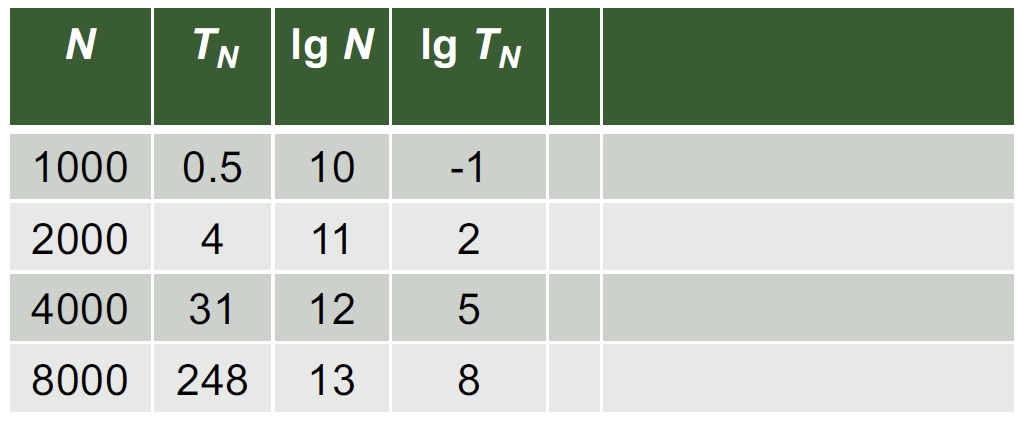

The results can also be calculated mathematically. N is the input size, TN are the measurements that we have made for the algorithm and the log() values can be computed with the calculator.

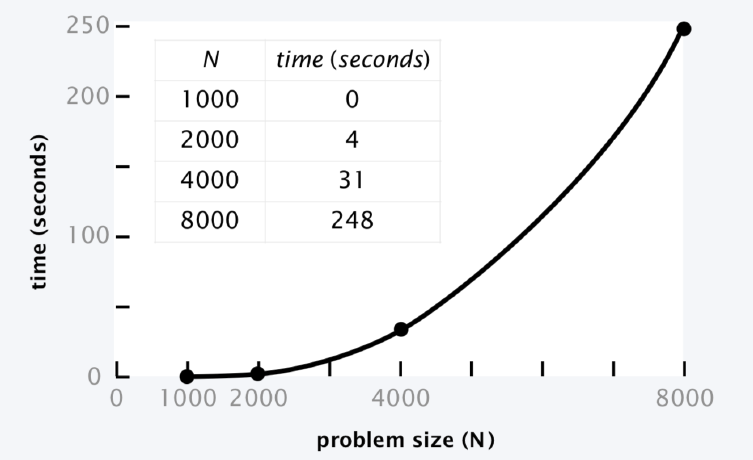

With the measured results, you can compute the slope of the execution time and this will enable you to compute the time for any given input by replacing N with the new input.

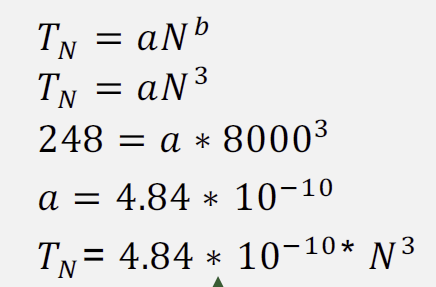

# Order of Growth <a class="anchor" id="paragraph13"></a>

As described above, the doubling factor of the `for loop` is 2. However, as shown in the graph below, different algorithms have different doubling factors. Best shown in the graph below.

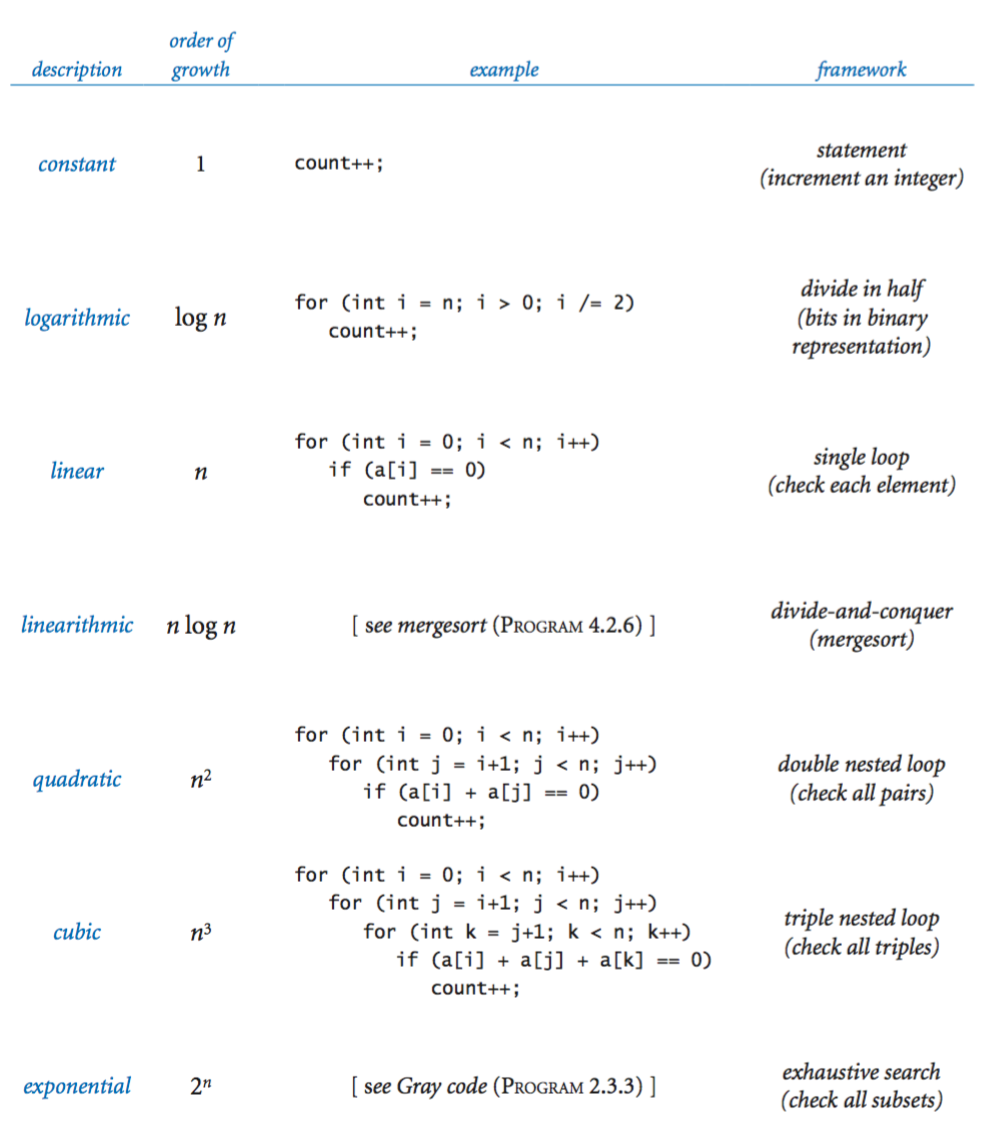

# **Results**

As we can see from the results above, the shell short is more efficent than the other two less complex sorting algorithms. The question is though, will the shell short algorithm always be the better choice when one needs to sort a list? Well that depends...

When considering a programming solution for a problem one thing to keep in mind is the pay-off between the time invested in optimizing the code and the actual time saved when one is later using the code. For example, let us assume that we have the knowledge to write the simpler bubble-sort algorithm, but lack the knowledge to write something more efficient. If there is a problem that consists of a shorter list that only needs to be sorted once, it might be wiser to just use the simpler algorithm, even though it is less efficient. Because the payoff for investing time in optimizing the code and learning more efficient ways to do a sorting algorithm might be very low. On the other hand, if we are facing a more complex problem where our sorting algorithm will be run a considerable amount of times, it might be worth investing time in optimizing the code to save a lot of time later when the program is running.

So, when deciding how to implement an algorithm solution to a problem one should always keep in mind the purpose of the implementation and then make a decision about the complexity of the code.

# Optimizing algorithm implementation performance <a class="anchor" id="paragraph14"></a>

When implementing code, performance efficiency is crucial. Therefore, we will examine some tips to optimize code. It will mostly be based on practical examples. 

## Optimizing with @jit <a class="anchor" id="paragraph15"></a>

We showed different ways to implement an algorithm. Now, we want to know whether it is possible to speed up the algorithm we implemented? There exist a few tools to do just that. One of them is the Python module `Numba`, a Just-In-Time compiler. One useful property of this library, is `@jit`, a decorator that can be placed before a function. There is no need to modify your code: just add `@jit` and it will (in most cases) speed up the implementation. Python is not the most efficient language to compute loops and inner loops. C would be much faster for example. This is why Cython was invented. It injects C into python code to make the implementation faster. `@jit` transforms your code into more efficient code. How does it work? It uses the Low Level Virtual Machine(LLVM), a compiler infrastructure to make code more efficient. There also exists alternatives,such as PyPy which uses JIT (Just-In-Time compiler) technology as well. However, we will only include an example with `Numba`.

Here is a simple example showing the usefulness of `@jit` with matrix multiplication.

In [1]:
import random
import numpy as np
import time
from numba import jit

random.seed(10)

# Create two random matrices
A = np.random.randint(100, size=(100,100))
B = np.random.randint(100, size=(100,100))

# Multiply the two matrices with loops
def matMult(A,B):
    #Create an empty matrix 
    C = np.zeros((100,100))
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(B.shape[0]):
                C[i][j] += A[i][k] * B[k][j]
    return C
        

# Implementation with @jit

# Just add the decorator
@jit
def matMultjit(A,B):
    C = np.zeros((100,100))
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(B.shape[0]):
                C[i][j] += A[i][k] * B[k][j]
    return C


# Create a function to measure time  
def time_processing(result, a, b):
    start_function = time.process_time()
    result(a,b)
    end_function = time.process_time()
    print('The function {} took {} seconds to execute'.format(result.__name__,end_function-start_function))                

    
# Measure the time difference between the two implementations
time_processing(matMult,A,B)
time_processing(matMultjit,A,B)

The function matMult took 1.1507639999999997 seconds to execute
The function matMultjit took 0.4103220000000003 seconds to execute


We can observe a clear difference between the original implementation and the boosted implementation with `@jit`, with around one second of difference. Of course, multiplying a matrix in python using loops is not optimal but the example was made to illustrate the properties of `@jit`. Sometimes loops are unavoidable in implementation and there are many situations where the `@jit` function can show its talent. However, `Numba` is not a magic one-size-fits-all solution. Indeed, the original code must be compatible with it. For example, `Numba` does not appreciate mixing types. If you deal with both integers and strings in the same list, it is most likely that `@jit` will not work. To prevent this, using `(nopython = TRUE)` will make sure that you get an error if this issue occurs, so that is possible to adjust the original code. `@njit` instead of `@jit` does exactly the same. Furthermore, `Numba` does not like python lists. That's why is it better to use `Numpy` arrays instead.

## Vectorization <a class="anchor" id="paragraph16"></a>

We know that loops are not particularly efficient to do long array computations in python. A better alternative is vectorization, which means using Numpy's linear algebra functions instead of loops. It helps to minimize the running time. A simple example to illustrate this is the dot produt of two vectors:

In [2]:
# Create two vectors
import numpy as np

random.seed(10)

v1 = np.random.randint(100000, size=(100000))
v2 = np.random.randint(100000, size=(100000))


# Compute the dot product using loops
def dot_prod_loop(v1,v2):
    v3 = 0
    for i in range(v1.shape[0]):
        v3 += v1[i]*v2[i]
    return v3


# Compute the dot product using vectorization
def dot_prod_vect(v1,v2):
    return np.dot(v1,v2)

# Make sure that the two function lead to the same output
assert(dot_prod_loop(v1,v2) == dot_prod_vect(v1,v2))

    
# Compare the two functions
time_processing(dot_prod_loop,v1,v2)
time_processing(dot_prod_vect,v1,v2)

The function dot_prod_loop took 0.04595500000000019 seconds to execute
The function dot_prod_vect took 0.0005069999999998132 seconds to execute


As expected, the time taken by the loop function is considerably higher than the numpy np.dot function. Numpy has many useful functions to avoid loops and make your code more performant.

## Pre-allocation <a class="anchor" id="paragraph17"></a>

Pre-allocation is another trick to make your code both more efficient and readable. You can pre-allocate the sizes of matrices, arrays and lists. It will prevent that the collections will grow dynamically during the process. Indeed, a matrix that grows at each step of a for loop will affect negatively time performance and memory use. Pre-allocation, on the contrary, will ensure that it has the memory space it requires from the beginning, thus improving efficiency. Let's look at another example to compare performance with and without pre-allocation:

In [3]:

n = 100000

# Without pre-allocation

# We just create an empty list, without defining its size
def no_preallocation(n):
    l = []
    for i in range(n):
        result = n*i
        l.append(result)
    
    
# With pre-allocation

# We fill a created list with n elements
def preallocation(n):
    l = [None] * n
    for i in range(n):
        l[i] = n*i
        
# Create a function to mesure time  
def time_processing2(result,n):
    start_function = time.process_time()
    result(n)
    end_function = time.process_time()
    print('The function {} took {} seconds to execute'.format(result.__name__,end_function-start_function))
    
#compare the two functions
time_processing2(no_preallocation,n)
time_processing2(preallocation,n)

The function no_preallocation took 0.01812300000000011 seconds to execute
The function preallocation took 0.011106999999999978 seconds to execute


As expected, the performance of the function with a pre-allocation is better.

## Generators <a class="anchor" id="paragraph18"></a>

Generators consists of so-called genetor functions that return generator objects. A generator function acts as a normal function, but instead of a `return` statement, it ends with a `yield` statement. The function only outputs one element at a time, while a standard function will return everything at the same time. The generator returns an object that is called a 'lazy operator', which means that we can iterate over it like a list. The difference between a lazy operator and a list is that the lazy operator does not store the values. The big advantage of generators is that they minimize the amount of memory they occupy. It can also improve computing time since it only prints what you need. To show this, let's see a practical example:

In [4]:
# Define a standard function
def compute_normal(n):
    number = 0
    numList = []
    while number < n:
        t = number**n
        numList.append(t)
        number +=1
        
    
    
# Define the generator
def compute_gen(n):
    number = 0
    while number < n:
        yield (number**n)
        number +=1

# Compare the running time and the memory usage

import memory_profiler
import time

def time_memory(result,n):
    start = time.process_time()
    memory1 = memory_profiler.memory_usage()
    output = result(n)
    end = time.process_time()
    memory2 = memory_profiler.memory_usage()
    print('The function {} took {} seconds and {} MB to execute'.format(result.__name__,end-start,memory2[0]-memory1[0]))

n = 10000 
compute_normal(n)
time_memory(compute_normal,n)
time_memory(compute_gen,n)        

The function compute_normal took 13.649114999999998 seconds and 8.13671875 MB to execute
The function compute_gen took 0.0011379999999974189 seconds and 0.0 MB to execute


The time and the memory needed for the generator are significantly lower than for the normal function. That is because we only call one element at a time. It is thus very useful if this is what we need. However, if we want to obtain the entire list of elements, it will likely take slightly longer than the normal function in terms of computing time, but the memory usage is much improved.

In [5]:
# Take the generator object
t = compute_gen(n)

# Define a function to iterate over the generator object
def printing(t):
    for i in range(10000):
        next(t)
        
# Measure performance
time_memory(printing,t)

The function printing took 13.503031 seconds and 0.0 MB to execute


# Further ideas for optimization <a class="anchor" id="paragraph19"></a>

## Profiling <a class="anchor" id="paragraph20"></a>

The idea of profiling is to find where the program is most time-consuming. The goal is to determine the time taken by each function. It is useful to find where the programm needs to be optimized. Indeed, it would be laborious to improve the code without knowing where the inefficiencies are. To do so, python offers several possibilities. A simple way is to use the module `timeit`, which measure the time taken by a certain chunk of code. Another option is to use `cProfile`, a C module, which will show the number of calls, the time taken by a function and several other useful metrics.

## Parallelization <a class="anchor" id="paragraph21"></a>

Parallization is used to execute mutiple parts of a program simultaneously. It can save substiantial processing time and thus improve code efficiency. In addition, it is particularly useful if your program consumes heavy CPU (central prcessing unit) computation power. Modern computers have multiple CPU cores which can execute instructions at the same time. Parallelization uses this facutly to run different processes or threads on several cores simultaneously. Processes represent computing tasks. Some part of the machine's memory space is specifically allocated to each of them so that the processes are independent from each other. Furthermore, every process consists of one or more threads (or subprocesses), which share access to data structure and memory with the parent process. In Python, you can either use the module `multiprocessing` or `threading` to run parallel tasks. It is also possible to use parallelization with `Numba`. Just add `(parallel = TRUE)` next to `@jit` or `@njit` and import `prange`. The efficiency of this method in `Numba` will depend on the specific problem you are dealing with.

# Implementation issues <a class="anchor" id="paragraph22"></a>

## Stack Overflow and Recursion limit errors <a class="anchor" id="paragraph23"></a>

Stack Overflow is an implementation issue where the program tries to use more memory than the call stack has available. The call stack is the data structure which allows the program to store informations about the different routines (or functions) that are called. A stack overflow issue can happen on functions that are recursive, which means that the function calls itself. It can also happen when you have a function A that call a function B that iteself call a function C that calls function A. Luckily, it is difficult to provoke a stack overflow in Python, unlike in C or java for example, since it has mechanisms to prevent it. It will instead return an error stating that the maximum recursion depth has been exceeded. This can happen in the case where a function calls itself infinitely.

Here is an example of an infinite recursion:

In [6]:
def hi():
    return hi()
print(hi())

RecursionError: maximum recursion depth exceeded

This returns "maximum recursion depth exceeeded", which is a guard against stack overflow. To avoid infinite recursion, it is important to check whether the recursion has an end.

### Recursion Limits <a class="anchor" id="paragraph24"></a>

Very long recursions can also cause errors. Let's take a function that computes the factorial of a given number. The factorial is defined as $n!=n*(n-1)*(n-2)...*1$. At each step the function calls itself. When computing the factorial of a sufficiently large number, it will exceed the maximum number of recursions that Python is capable of.

In [7]:
def fact(n):
    if n <=1:
        return 1
    return n* fact(n-1)
print(fact(5000))        

RecursionError: maximum recursion depth exceeded in comparison

The program returns the error "maximum recursion depth exceeded in comparison". To solve this issue, we can either write the algorithm in an iterative way or increase the recursion limit.

In [8]:
# Iterative version the factorial algorithm

def fact_it(n):
    if n <= 1:
        return 1
    else:
        fact = 1
        while(n > 1):
            fact *= n
            n -= 1
        return fact
    
# Print the output
print(fact_it(5000))

4228577926605543522201064200233584405390786674626646748849782402181358052708108200690899047871706387537084746657300685445878486066683812736337210893772787631279390363058462160643904478986982239871929708896211612652968321775500399242196837031469072644728787897904047548841622152266719284109692369104495659717363529484002238403811206448202308576711045023061748947554283097617817240408053248099278093287840554861993645482912118762582488021891739779000502132125980436392446264607705113588465951086754705858339246552255890354744359883473831789880346330084586315102090915099356538200109330479657425567419309170551728052002360750859911976352287559079020433697431235069168312119244959715562674075214621989862330886259983028598648575787494459631152869708867100462684236481789899054546908613916132183441741488071862344481148312094903611965468727677556178868287202691048140924564103418359756042764581615131785759016610717825441569808833593727299956033713712004710494376562911424886053352994996423006999722049181

Another way to solve this issue is to increase the recursion limit of your algorithm. But be careful with this solution, because the limit cannot be increased infinity and may result in a stack overflow. This is why rewriting the algorithm in an iterative way is often better.

In [9]:
import sys

# Increase the recursive limit
sys.setrecursionlimit(100000)

# Print the output
print(fact(5000))

4228577926605543522201064200233584405390786674626646748849782402181358052708108200690899047871706387537084746657300685445878486066683812736337210893772787631279390363058462160643904478986982239871929708896211612652968321775500399242196837031469072644728787897904047548841622152266719284109692369104495659717363529484002238403811206448202308576711045023061748947554283097617817240408053248099278093287840554861993645482912118762582488021891739779000502132125980436392446264607705113588465951086754705858339246552255890354744359883473831789880346330084586315102090915099356538200109330479657425567419309170551728052002360750859911976352287559079020433697431235069168312119244959715562674075214621989862330886259983028598648575787494459631152869708867100462684236481789899054546908613916132183441741488071862344481148312094903611965468727677556178868287202691048140924564103418359756042764581615131785759016610717825441569808833593727299956033713712004710494376562911424886053352994996423006999722049181